In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [1]:
# Imports
from sympy import init_printing, Matrix, symbols, sqrt, Rational, acos
from numpy import matrix, transpose, sqrt
from numpy.linalg import pinv, inv, det, svd, norm
from scipy.linalg import pinv2
init_printing()

# An overview of key ideas

## Moving from vectors to matrices

Consider two position vectors $\underline{u} , \underline{v} \in \mathbb{R}^{3}$.  They can be expressed as column vectors.

$$ \underline{u}=\begin{bmatrix}1\\-1\\0\end{bmatrix} \\ \underline{v}=\begin{bmatrix}0\\1\\-1\end{bmatrix} \tag{1} $$

We can add constant scalar multiples of these vectors, with the scalars $x_1$ and $x_2$.

$$ {x}_{1}\underline{u}+{x}_{2}\underline{v}=\underline{b} \tag{2} $$

This is simple vector addition.  It's easy to visualize that if we combine all possible combinations, that we start filling a plane through the origin.  Adding a third vector that is not in this plane will, using all possible linear combinations, extend to fill all of three-dimensional space.

$$ \underline{w}=\begin{bmatrix}0\\0\\1\end{bmatrix} \tag{3} $$

We now have (4) below.

$$ {x}_{1}\underline{u}+{x}_{2}\underline{v}+{x}_{3}\underline{w}={b} \tag{4} $$

We can write the coefficients of the vectors as a vector of unknowns, $\underline{x}$, shown in (5).

$$ \underline{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\tag{5}$$

Let us now write (4) is the form $A \underline{x} = \underline{b}$.

$$ \begin{bmatrix} 1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1 \end{bmatrix}\begin{bmatrix} { x }_{ 1 } \\ { x }_{ 2 } \\ { x }_{ 3 } \end{bmatrix}=\begin{bmatrix} { x }_{ 1 } \\ { x }_{ 2 }-{ x }_{ 1 } \\ { x }_{ 3 }-{ x }_{ 2 } \end{bmatrix} \tag{6} $$

We create matrix $A$ in code below.

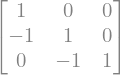

In [2]:
A = Matrix([[1, 0, 0], [-1, 1, 0], [0, -1, 1]]) # Creating a matrix and putting
# it into a computer variable called C
A # Displaying it to the screen

This is the column-view of matrix-vector multiplication as opposed to the row view.  Matrices are seen as column, representing vectors.  Each element of the column vector $\underline{x}$ is a scalar multiple of the corresponding column in the matrix $A$.

$$ { x }_{ 1 }\begin{bmatrix} 1 \\ -1 \\ 0 \end{bmatrix}+{ x }_{ 2 }\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}+{ x }_{ 3 }\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}=\begin{matrix} { x }_{ 1 } \\ -{ x }_{ 1 }+{ x }_{ 2 } \\ -{ x }_{ 2 }+{ x }_{ 3 } \end{matrix} = {x}_{1}\underline{u}+{x}_{2}\underline{v}+{x}_{3}\underline{w} \tag{7}$$

If we consider the solution vector, $\underline{b}$, then we can write (8).

$$ \begin{bmatrix} { x }_{ 1 } \\ { x }_{ 2 }-{ x }_{ 1 } \\ { x }_{ 3 }-{ x }_{ 2 } \end{bmatrix} = \begin{bmatrix}{b}_{1}\\{b}_{2}\\{b}_{3}\end{bmatrix} \tag{8} $$

By substitution this can be _converted_ to (9).

$$ \begin{bmatrix} { x }_{ 1 } \\ { x }_{ 2 } \\ { x }_{ 3 } \end{bmatrix}=\begin{bmatrix} { b }_{ 1 } \\ { b }_{ 1 }+{ b }_{ 2 } \\ { b }_{ 1 }+{ b }_{ 2 }+{ b }_{ 2 } \end{bmatrix} \tag{9} $$

This is, in fact, a contrived example.  Looking closely, we can write the right-hand side of (9) as a matrix times $\underline{b}$.

$$ \begin{bmatrix}1&0&0\\1&1&0\\1&1&1\end{bmatrix}\begin{bmatrix}{b}_{1}\\{b}_{2}\\{b}_{3}\end{bmatrix} \tag{10} $$

This matrix is the inverse of $A$ such that $\underline{x} = A^{-1} \underline{b}$.  We will learn much more about matrix inverses and whether matrices are invertible.  The `sympy` library has a method called `.inv()` that will calculate the inverse.

In [3]:
A.det()

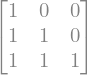

In [4]:
A.inv()  # Inverse of matrix A

Something else we will come across is _lower triangular form_.  Notice that all the values above the _main diagonal_ (values from the top-left to the bottom-right) as zero value.  This matrix is _lower triangular_.

Now, let's replace $\underline{w}$ and create a matrix $M$.  Unlike our original $\underline{w}$, this one is _special_ (for our purposes).

In [5]:
x1, x2, x3, b1, b2, b3 = symbols('x1, x2, x3, b1, b2, b3') # Creating algebraic symbols
# This reserves these symbols so as not to see them as computer variable names

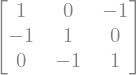

In [6]:
M = Matrix([[1, 0, -1], [-1, 1, 0], [0, -1, 1]]) # Creating a matrix and putting
# it into a computer variable called M
M # Displaying it to the screen

And a vector of unknowns.

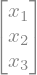

In [7]:
x_vect = Matrix([[x1], [x2], [x3]]) # Giving this columns vector a computer
# variable name
x_vect

Now, $M \underline{x}$ can be calculated.

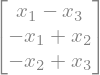

In [8]:
M * x_vect

For the solution vector, we have three equations that we can create.

$$ { x }_{ 1 }-{ x }_{ 3 }={ b }_{ 1 }\\ { x }_{ 2 }-{ x }_{ 1 }={ b }_{ 2 }\\ { x }_{ 3 }-{ x }_{ 2 }={ b }_{ 3 } \tag{11}$$

Adding the left and righ-hand sides gives us $x_1 - x_3 + x_2 - x_1 + x_3 - x_2 = b_1 + b_2 + b_3$.  

This leaves us with a constraint for $\underline{b}$ such that $ 0={ b }_{ 1 }+{ b }_{ 2 }+{ b }_{ 3 } $.

The problem is clear to see geometrically as the new $\underline{w}$ is in the same plane as $\underline{u}$ and $\underline{v}$.  In essence $\underline{w}$ did not add anything.  All combinations of $\underline{u}$, $\underline{v}$, and $\underline{w}$ will still be in the same plane.

The first $\underline{w}$ above created a matrix with three independent columns and their linear combinations could fill all of three-dimensional space (they spanned $\mathbb{R}^{3}$).  This made the first matrix what we will call _invertible_ as opposed to the second one, $M$, which is not invertible.

Below, we create the three column vectors and check that $- \underline{u} + \left( - \underline{v} \right) = \underline{w}$.  A linear combination of columns (vectors) one and two, produces three.

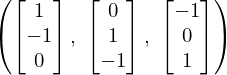

In [29]:
u = Matrix([[1], [-1], [0]])
v = Matrix([[0], [1], [-1]])
w = Matrix([[-1], [0], [1]])
u, v, w

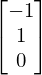

In [46]:
-u

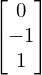

In [47]:
-v

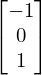

In [49]:
-u - v

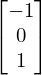

In [44]:
w

In [50]:
-u - v == w

True

## Example problems

### Example problem 1

+ Suppose $A$ is a matrix with the following solution
$$ {A}{\underline{x}}=\begin{bmatrix}1\\4\\1\\1\end{bmatrix} \\ \underline{x}=\begin{bmatrix}0\\1\\1\end{bmatrix}+{c}\begin{bmatrix}0\\2\\1\end{bmatrix} $$
+ What can you say about the columns of $A$?

#### Solution

In [51]:
c = symbols('c')
x_vect = Matrix([[0], [1 + 2 * c], [1 + c]])
b = Matrix([[1], [4], [1], [1]])

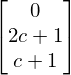

In [52]:
x_vect

In [53]:
b

Note the following:
+ $\underline{x}$ is of size $m \times n$ and that is $ 3 \times 1 $
+ $\underline{b}$ is of size $ 4 \times 1 $
+ Therefor, $A$ must be of size $ 4 \times 3 $ and each column vector in $A$ is in $\mathbb{R}^{4}$

Let's call these columns of $A$ $C_1, C_2, C_3$, as illustrated in (12).

$$ \begin{bmatrix} \vdots  & \vdots  & \vdots  \\ { C }_{ 1 } & { C }_{ 2 } & { C }_{ 3 } \\ \vdots  & \vdots  & \vdots  \\ \vdots  & \vdots  & \vdots  \end{bmatrix} \tag{12} $$

With the particular way in which $\underline{x}$ was written, we can say that we have a particular solution and a special solution, denoted as $ {A}\left({x}_{p}+{c}\cdot{x}_{s}\right)= \underline{b} $.

For $ c = 0 $ we have:
$$ {A}{\underline{x}}_{p}=b $$

For $c = 1 $ we have:
$$ \begin{align} A{ x }_{ p }+A{ \underline{x} }_{ s } &= b \\ \because \quad A{ \underline{x} }_{ p } &= b \\ b+A{ \underline{x} }_{ s } &= b \\ \therefore \quad A{ \underline{x} }_{ s } &= 0 \end{align} $$

We also have that the following
$$ { \underline{x} }_{ p }=\begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix},\quad { \underline{x} }_{ s }=\begin{bmatrix} 0 \\ 2 \\ 1 \end{bmatrix} $$

For $ \underline{x}_{p}$ we have the following:
$$ \begin{bmatrix} \vdots  & \vdots  & \vdots  \\ { C }_{ 1 } & { C }_{ 2 } & { C }_{ 3 } \\ \vdots  & \vdots  & \vdots  \\ \vdots  & \vdots  & \vdots  \end{bmatrix}\begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix} = \underline{b} \quad \Rightarrow \quad { C }_{ 2 }+{ C }_{ 3 }= \underline{b} $$

For $ \underline{x}_{s}$ we have the following:
$$ \begin{bmatrix} \vdots  & \vdots  & \vdots  \\ { C }_{ 1 } & { C }_{ 2 } & { C }_{ 3 } \\ \vdots  & \vdots  & \vdots  \\ \vdots  & \vdots  & \vdots  \end{bmatrix}\begin{bmatrix} 0 \\ 2 \\ 1 \end{bmatrix}=\underline { 0 } \quad \Rightarrow \quad 2{ C }_{ 2 }+{ C }_{ 3 } = \underline{0} $$

Solving for $C_2$ and $C_3$ we have the following:
$$ \begin{align} {C}_{3} &= -2{C}_{2} \\ {C}_{2}-2{C}_{2} &= b \\ {C}_{2} &= -b \\ {C}_{3} &= 2b \end{align} $$

As for the first column of $A$, we need to know more about ranks and subspaces.  We see, though, that columns two and three are already constant multiples of each other.  So, as long as column one is not a constant multiple of $\underline{b}$, we are safe.

$$ A=\begin{bmatrix} \vdots  & 1 & 2 \\ { C }_{ 1 } & 4 & 8 \\ \vdots  & 1 & 2 \\ \vdots  & 1 & 2 \end{bmatrix} $$